In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
le=LabelEncoder()
min=MinMaxScaler()

In [2]:
data=pd.read_csv('/content/Mall_Customers.csv')
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
data['Gender']= label_encoder.fit_transform(data['Gender'])

data['Gender'].unique()

array([1, 0])

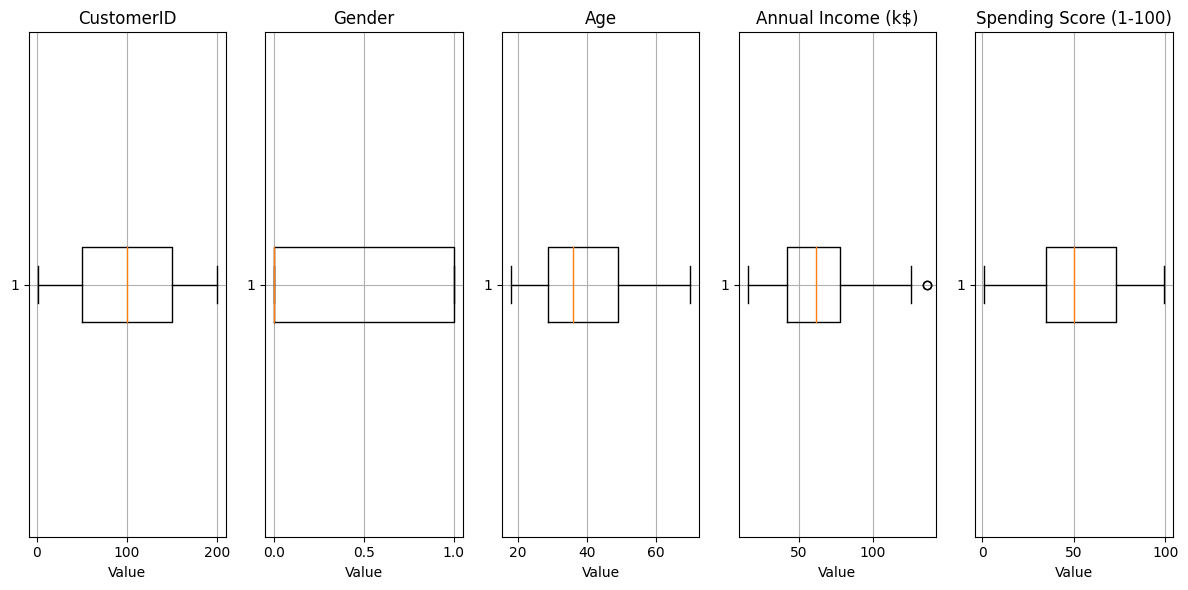

In [5]:
plt.figure(figsize=(12, 6))
for column in data.columns:
    plt.subplot(1, len(data.columns), data.columns.get_loc(column) + 1)
    plt.boxplot(data[column], vert=False)
    plt.title(column)
    plt.xlabel('Value')
    plt.grid(True)

plt.tight_layout()
plt.show()

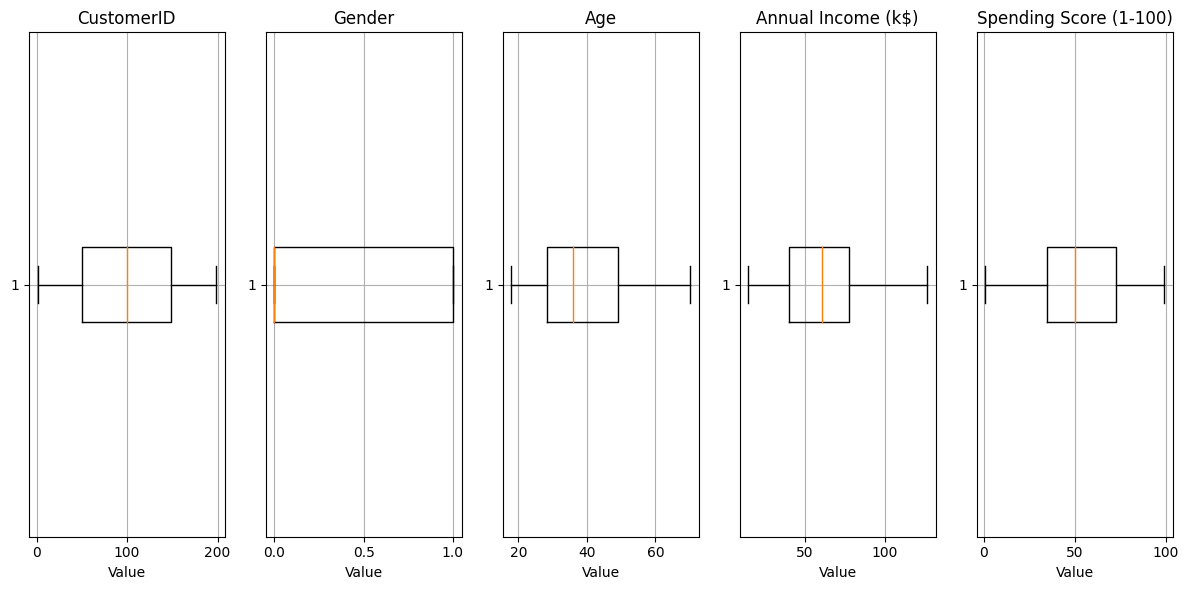

In [6]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
threshold = 1.5
data = data[~((data < (Q1 - threshold * IQR)) | (data > (Q3 + threshold * IQR))).any(axis=1)]

plt.figure(figsize=(12, 6))
for column in data.columns:
    plt.subplot(1, len(data.columns), data.columns.get_loc(column) + 1)
    plt.boxplot(data[column], vert=False)
    plt.title(column)
    plt.xlabel('Value')
    plt.grid(True)

plt.tight_layout()
plt.show()

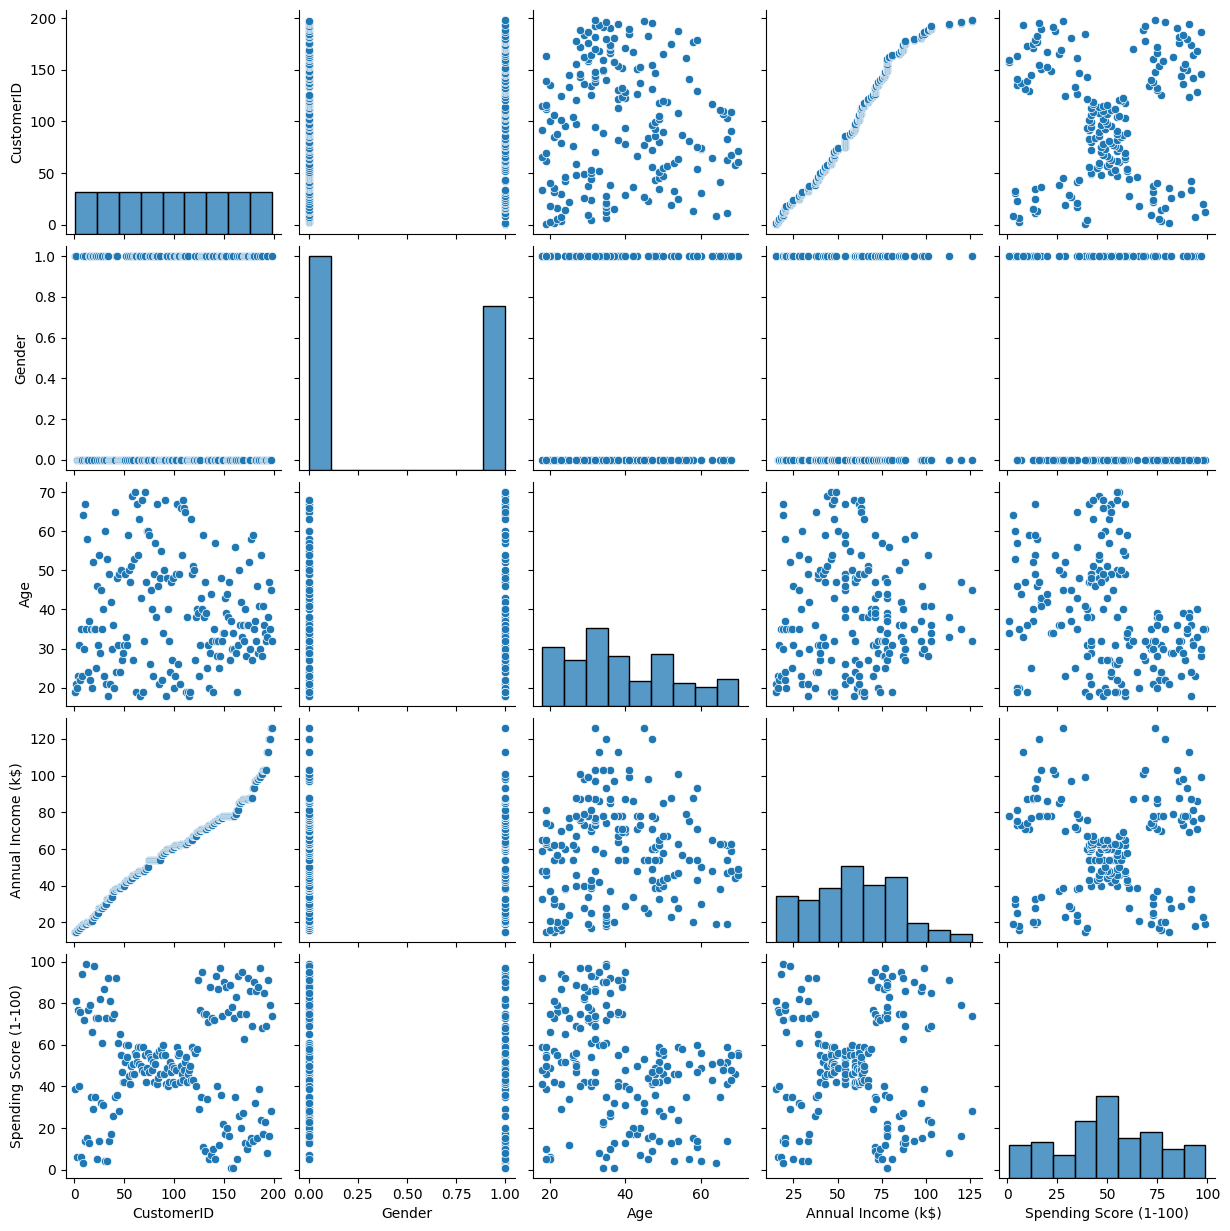

In [7]:
sns.pairplot(data)

<Axes: >

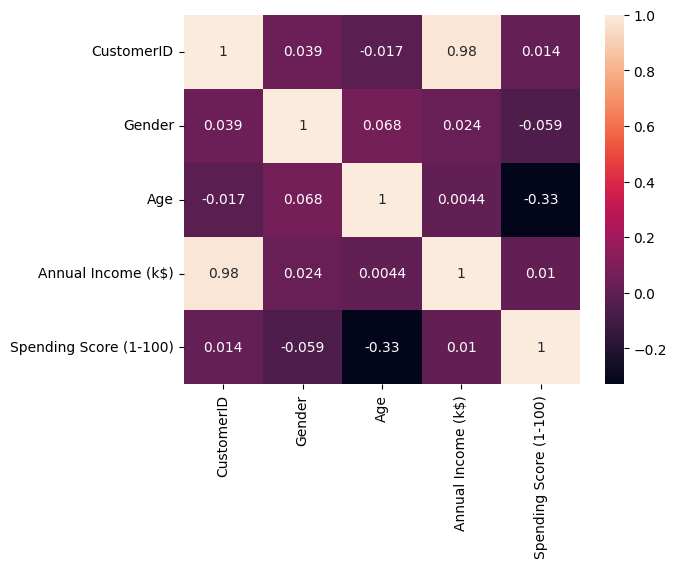

In [8]:
sns.heatmap(data.corr(),annot=True)

In [9]:
data.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,198.000000,198.000000,198.000000,198.000000,198.000000
mean,99.500000,0.434343,38.929293,59.787879,50.196970
std,57.301832,0.496927,14.016852,25.237259,25.746846
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.250000,0.000000,28.250000,40.500000,35.000000
50%,99.500000,0.000000,36.000000,61.000000,50.000000
75%,148.750000,1.000000,49.000000,77.750000,72.750000
max,198.000000,1.000000,70.000000,126.000000,99.000000


In [10]:
data.drop(['CustomerID'],axis=1)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
193,0,38,113,91
194,0,47,120,16
195,0,35,120,79
196,0,45,126,28


In [11]:
x=data.drop(['Spending Score (1-100)'],axis=1)
x.head()

,CustomerID,Gender,Age,Annual Income (k$)
0,1,1,19,15
1,2,1,21,15
2,3,0,20,16
3,4,0,23,16
4,5,0,31,17


In [12]:
y=data['Spending Score (1-100)']
y.head()

0    39
1    81
2     6
3    77
4    40
Name: Spending Score (1-100), dtype: int64

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


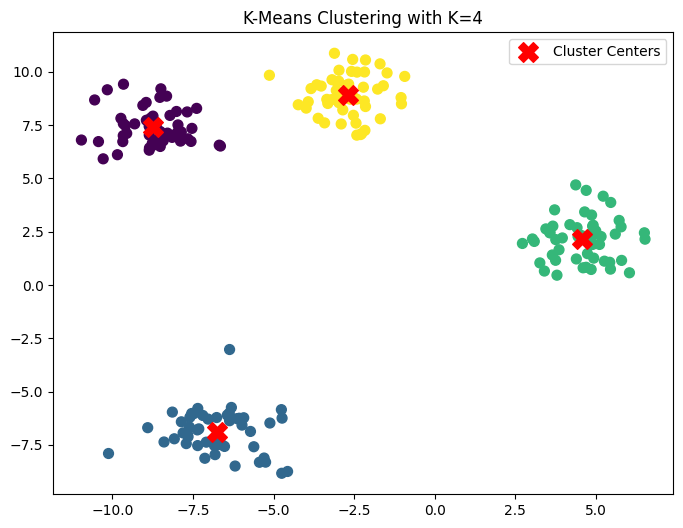

In [13]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate synthetic data
data, _ = make_blobs(n_samples=198, centers=4, random_state=42)

# Create a K-Means model with a specified number of clusters (K)
k = 4
kmeans = KMeans(n_clusters=k)

# Fit the model to the data
kmeans.fit(data)

# Get the cluster assignments for each data point
labels = kmeans.labels_

# Get the coordinates of cluster centers
centers = kmeans.cluster_centers_

# Plot the data points and cluster centers
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.title(f'K-Means Clustering with K={k}')
plt.legend()
plt.show()
